In [1]:
import numpy as np
from scipy.sparse import csr_matrix
import sys
sys.path.append('../../')

from flow_solver.finite_element_model import FEM
from flow_solver.mesh_generator_rec import MeshDiffuser
from optimizer import Annealing, AnnealingSolver, PolyTop

# Topology Optimization for Diffuser Problem

## Computational Mesh

In [2]:
# Create Meshes for L-Channel.
n_elem_for_width = 32
n_elem_for_height = 32

mesh_v = MeshDiffuser('Q2', n_elem_for_width, n_elem_for_height)
mesh_p = MeshDiffuser('Q1', n_elem_for_width, n_elem_for_height)

if n_elem_for_width < 5:
    mesh_v.plot()
    mesh_p.plot()

## Finite Element Model

### Boundary Conditions

In [3]:
def inlet_velocity(mesh, i_node):
    x = mesh.coords[i_node][0]; y = mesh.coords[i_node][1]
    v_x = 4*(1.-y)*y; v_y = 0.0
    return np.array([v_x, v_y])

In [4]:
def outlet_velocity(mesh, i_node, width):
    x = mesh.coords[i_node][0]; y = mesh.coords[i_node][1]
    v_x = 0.0; v_y = 0.0
    return np.array([v_x,v_y])

In [5]:
# Compute boundary velocities.
width =1/3
boundary_velocity = {key: [] for key in mesh_v.boundary_nodes.keys()}
for boundary in mesh_v.boundary_nodes.keys():
    for i_node in mesh_v.boundary_nodes[boundary]:
        if boundary == 'inlet':
            boundary_velocity[boundary].append(inlet_velocity(mesh_v, i_node))
        elif boundary == 'wall':
            boundary_velocity[boundary].append(np.zeros(2))

# Set values for Dirichlet boundary conditions.
# Velocity.
BC = []
for boundary in mesh_v.boundary_nodes.keys():
    for i_node, node in enumerate(mesh_v.boundary_nodes[boundary]):
        if boundary == 'inlet' or boundary == 'wall' :
            BC.append([node, 0, boundary_velocity[boundary][i_node][0]])
            BC.append([node, 1, boundary_velocity[boundary][i_node][1]])
boundary_values_v = np.array(BC)

# Pressure.
BC = []
for boundary in mesh_p.boundary_nodes.keys():
    for i_node, node in enumerate(mesh_p.boundary_nodes[boundary]):
        if boundary == 'inlet' or boundary == 'wall':
            pass
boundary_values_p= np.array(BC)

### Material Properties

In [14]:
viscosity = 1.0; 
density = 1

### Finite Element Model

In [18]:
fem = FEM(mesh_v, mesh_p, viscosity, density)
fem.set_boudary_values_v(boundary_values_v)

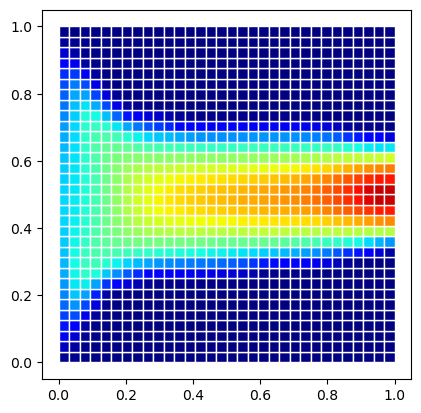

In [21]:
U, u_e, v_e, p_e, F, f=fem.solve()
coords, elements, boundary_nodes, neighbor_elements=mesh_p.create_mesh_Q1(n_elem_for_width, n_elem_for_height, 1., 1.)
from flow_solver import Q2Q1FEM
Q2Q1FEM.Plot_patch(n_elem_for_width,coords,elements,np.sqrt(u_e**2+v_e**2),3.,0,cmap='jet')

## Classical optimization

In [22]:
# Settings for Optimization.
volume_fraction_max = 0.5 # Volume fraction.

density_initial = volume_fraction_max*np.ones(mesh_v.n_elem) # Initial density, i.e., design variables, for each element.
density_initial_QA = np.ones(mesh_v.n_elem) # Initial density, i.e., design variables, for each element.
density_min = 0.0; density_max = 1.0 # Lower and upper bound for design variables.

design_tolerance = 0.01 # Convergence tolerance on design variables.
max_iterations = 150 # Max. number of optimization steps.

opt_OCMove = 0.2  # Allowable move step in OC update scheme
opt_OCEta = 0.5  # Exponent used in OC update scheme

q_values = [0.01, 0.1, 1.] #

############### q = 0.01 ###############
Iteration: 1, Objective Function: 0.040541910708396564, Volume Fraction: 0.5000235543172489
Iteration: 2, Objective Function: 0.029177920822715336, Volume Fraction: 0.5000007820874687
Iteration: 3, Objective Function: 0.01923529415579005, Volume Fraction: 0.49999010210986183
Iteration: 4, Objective Function: 0.011142149377836271, Volume Fraction: 0.5000760120247917
Iteration: 5, Objective Function: 0.007848971115783632, Volume Fraction: 0.49999267499096944


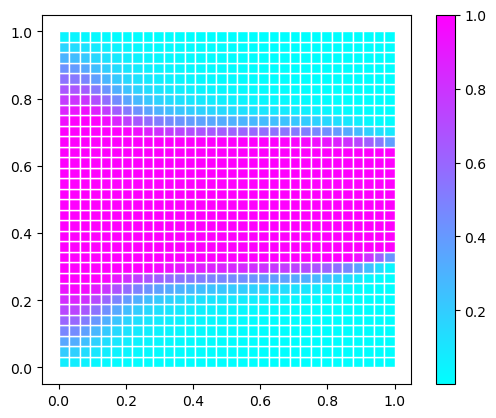

Iteration: 6, Objective Function: 0.007085416386755519, Volume Fraction: 0.5000327472170261
Iteration: 7, Objective Function: 0.006873279473176629, Volume Fraction: 0.5000616789505294
Iteration: 8, Objective Function: 0.006804786179764268, Volume Fraction: 0.5000600490438609
Iteration: 9, Objective Function: 0.006780648089526, Volume Fraction: 0.5000545604279156
Iteration: 10, Objective Function: 0.0067712099349841294, Volume Fraction: 0.5000042263324936


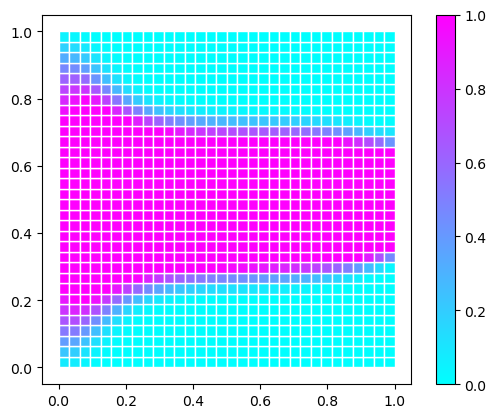

Iteration: 11, Objective Function: 0.006768804536793901, Volume Fraction: 0.5000309848934887


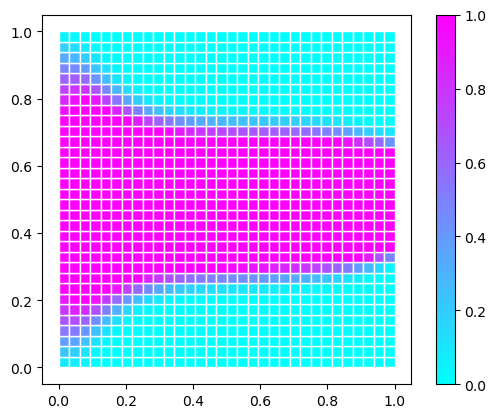

############### q = 0.1 ################
Iteration: 1, Objective Function: 0.010480834648251312, Volume Fraction: 0.5000119192517488
Iteration: 2, Objective Function: 0.009117739788382206, Volume Fraction: 0.49998609187557935
Iteration: 3, Objective Function: 0.008774006643432943, Volume Fraction: 0.49999567910413245
Iteration: 4, Objective Function: 0.008696202808196248, Volume Fraction: 0.5000021849486458
Iteration: 5, Objective Function: 0.008671656943973169, Volume Fraction: 0.5000049237367908


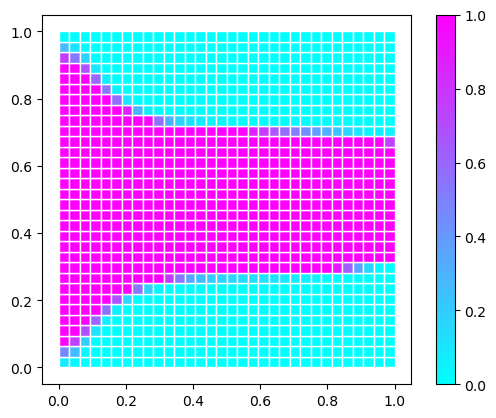

Iteration: 6, Objective Function: 0.0086595285775107, Volume Fraction: 0.4999949267335824
Iteration: 7, Objective Function: 0.008653075388224234, Volume Fraction: 0.49999145591505995
Iteration: 8, Objective Function: 0.00864858157359365, Volume Fraction: 0.5000108710411966
Iteration: 9, Objective Function: 0.008644256757301887, Volume Fraction: 0.4999901818721552
Iteration: 10, Objective Function: 0.008643097997859703, Volume Fraction: 0.4999883196300886


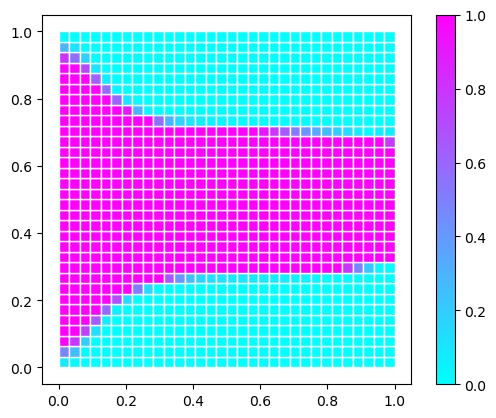

Iteration: 11, Objective Function: 0.008641463314751836, Volume Fraction: 0.5000049871937826
Iteration: 12, Objective Function: 0.008639185360413134, Volume Fraction: 0.5000077868751935
Iteration: 13, Objective Function: 0.008637923712805046, Volume Fraction: 0.5000066873531233
Iteration: 14, Objective Function: 0.00863704016039648, Volume Fraction: 0.5000036945360569
Iteration: 15, Objective Function: 0.008636380654335082, Volume Fraction: 0.4999907571882982


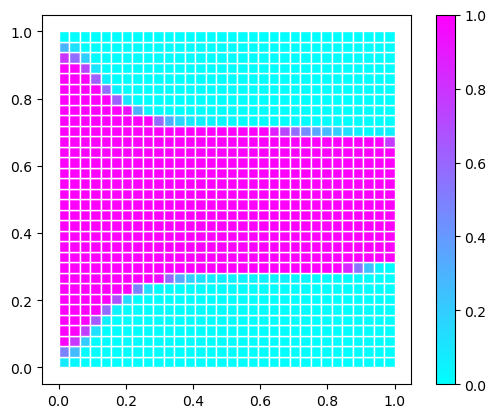

Iteration: 16, Objective Function: 0.008636387284993623, Volume Fraction: 0.5000006560610928
Iteration: 17, Objective Function: 0.008635220797126378, Volume Fraction: 0.5000068804389239
Iteration: 18, Objective Function: 0.008634327494204784, Volume Fraction: 0.4999901385854836
Iteration: 19, Objective Function: 0.00863475937321055, Volume Fraction: 0.5000028653811293
Iteration: 20, Objective Function: 0.008633613788862746, Volume Fraction: 0.4999929642380475


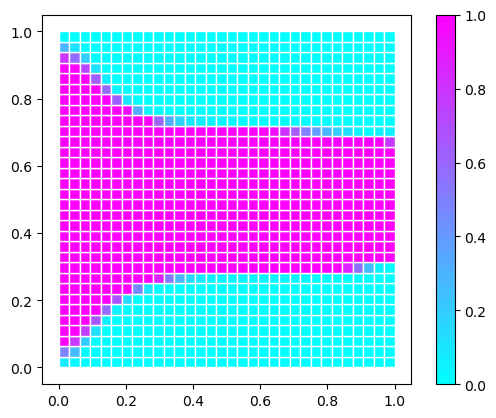

Iteration: 21, Objective Function: 0.008633759122313197, Volume Fraction: 0.4999903226985636
Iteration: 22, Objective Function: 0.008633539907906081, Volume Fraction: 0.4999934401574308
Iteration: 23, Objective Function: 0.008633033545949879, Volume Fraction: 0.500001688056164
Iteration: 24, Objective Function: 0.008632269951674569, Volume Fraction: 0.4999921708698253
Iteration: 25, Objective Function: 0.00863251203776917, Volume Fraction: 0.4999926342885806


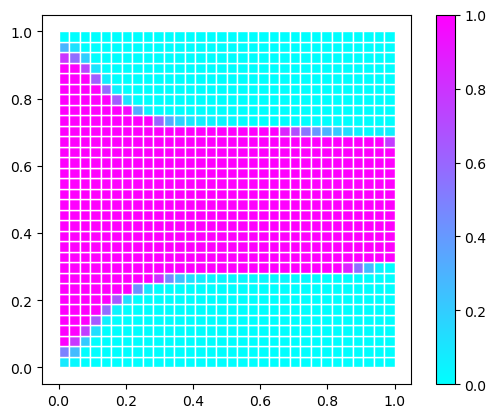

Iteration: 26, Objective Function: 0.008632222097513433, Volume Fraction: 0.4999934620030121
Iteration: 27, Objective Function: 0.008631937897892747, Volume Fraction: 0.4999954056099278
Iteration: 28, Objective Function: 0.008631617565189391, Volume Fraction: 0.4999996742739692


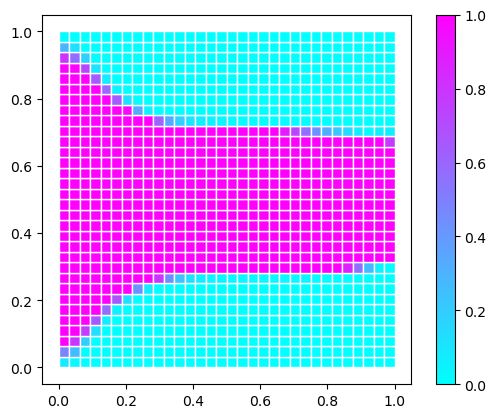

############### q = 1.0 ################
Iteration: 1, Objective Function: 0.009475481864619575, Volume Fraction: 0.49999716951800194
Iteration: 2, Objective Function: 0.00922873271498257, Volume Fraction: 0.5000037635764374
Iteration: 3, Objective Function: 0.009116743114333428, Volume Fraction: 0.5000018421190922
Iteration: 4, Objective Function: 0.00904935853689829, Volume Fraction: 0.5000004198733164
Iteration: 5, Objective Function: 0.009015794832535859, Volume Fraction: 0.5000000329376431


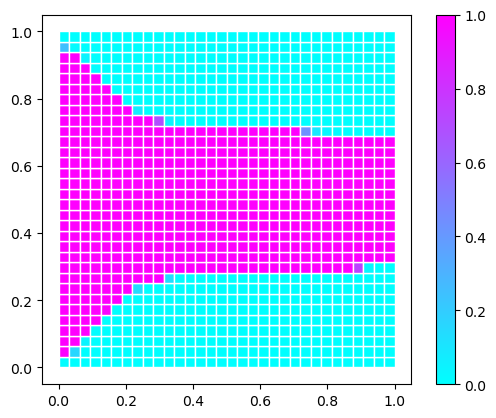

Iteration: 6, Objective Function: 0.008991576331783328, Volume Fraction: 0.49999884857464294
Iteration: 7, Objective Function: 0.008980422465782255, Volume Fraction: 0.5000003583825537
Iteration: 8, Objective Function: 0.00896979932675677, Volume Fraction: 0.4999998003165175
Iteration: 9, Objective Function: 0.00896667792054677, Volume Fraction: 0.5000003008640415
Iteration: 10, Objective Function: 0.008962481411532022, Volume Fraction: 0.4999998858496179


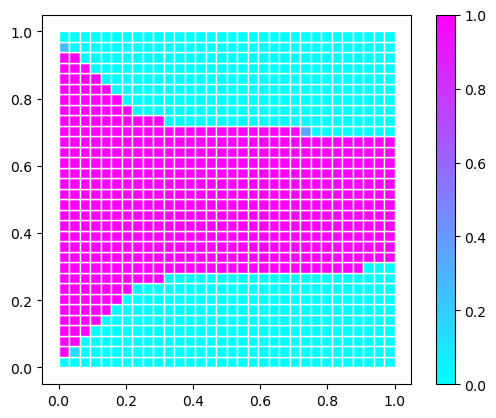

Iteration: 11, Objective Function: 0.008959272927385603, Volume Fraction: 0.5000000534708826
Iteration: 12, Objective Function: 0.008958598946319106, Volume Fraction: 0.4999996445923123
Iteration: 13, Objective Function: 0.008958072022391074, Volume Fraction: 0.499999790198174
Iteration: 14, Objective Function: 0.00895761162513705, Volume Fraction: 0.49999963847972617
Iteration: 15, Objective Function: 0.008957244541129348, Volume Fraction: 0.49999961798457393


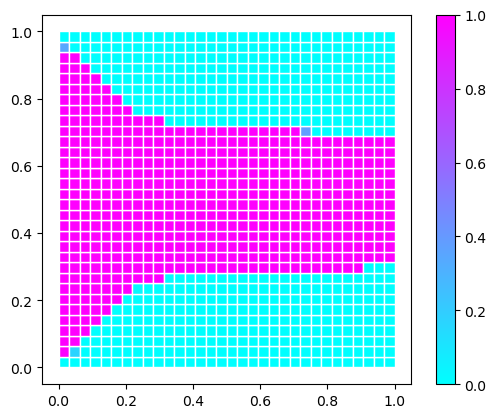

Iteration: 16, Objective Function: 0.008956934079865917, Volume Fraction: 0.5000002832322135
Iteration: 17, Objective Function: 0.008956639393894027, Volume Fraction: 0.5000001233884973
Iteration: 18, Objective Function: 0.008956430895464329, Volume Fraction: 0.4999998929214972


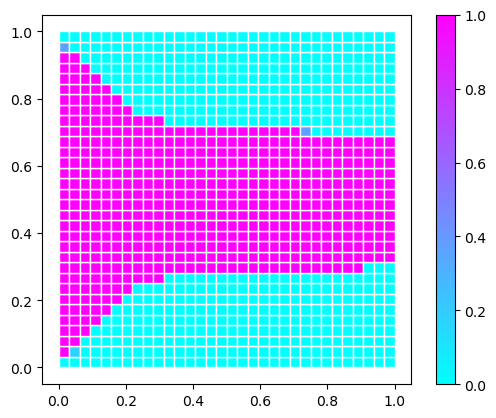

In [23]:
poly_top = PolyTop(fem)
poly_top.optimize(density_initial, density_min, density_max, volume_fraction_max,
                  design_tolerance, max_iterations, q_values,
                  opt_OCMove, opt_OCEta)

### Evaluation

Objective Function:0.009010622703029358, Volume fraction:0.4990234375


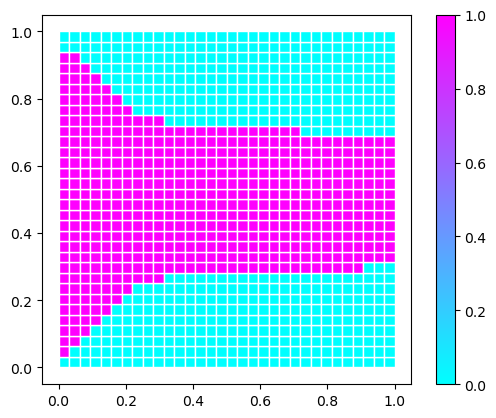

In [24]:
z = poly_top.fem.density
check=[]
for i in range(len(z)):
    if z[i]<=0.5:
        check.append(0)
    else:
        check.append(1)
z_hev=np.array(check)
epsilon = 8*(10**-2)
E_eva = 1./epsilon*(1-z_hev)*1/(1+z_hev)
_, _, _, _, _, f_eva = poly_top.fem.solve(E_eva)
print(f'Objective Function:{f_eva}, Volume fraction:{sum(check)/poly_top.fem.mesh_p.area}')
poly_top.fem.plot_eva(z_hev)

## Optimization with Annealing

In [25]:
from amplify.client import FixstarsClient
client = FixstarsClient()
client.parameters.timeout = 1000
client.parameters.outputs.duplicate = True
client.token = 'token '
#client.proxy = ''

annealing_solver = AnnealingSolver(client)

Iteration: 0, Objective Function: 0.025147014333733057, Volume Fraction: 0.5041232638888875
2.8649620102393403 0.7449643238409316


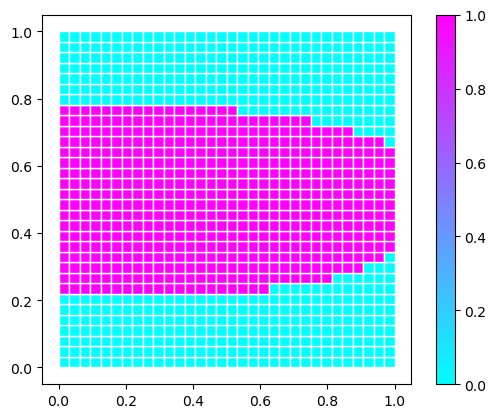

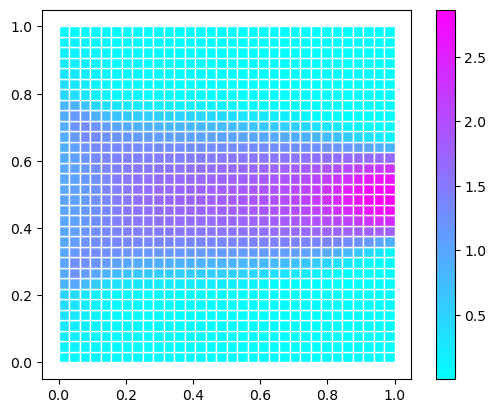

Iteration: 1, Objective Function: 0.012184893117915215, Volume Fraction: 0.5032552083333331
2.8780595016089383 0.9654990706997852


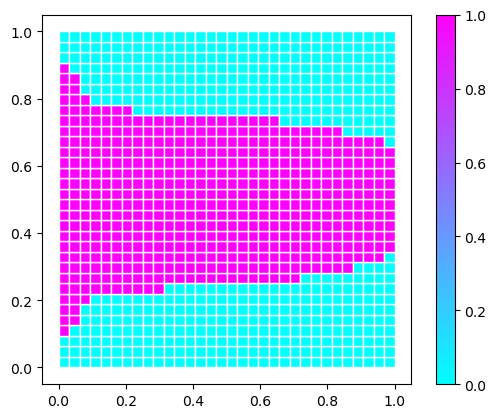

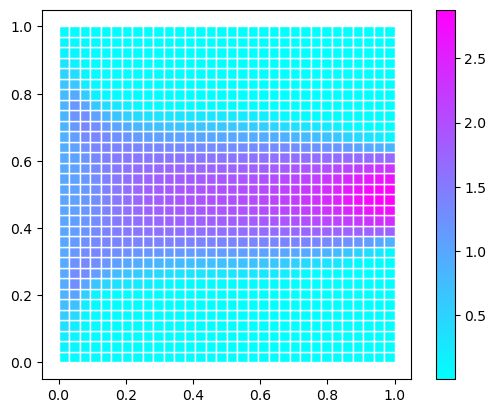

Iteration: 2, Objective Function: 0.01118590825950591, Volume Fraction: 0.49555121527777635
2.8817164414430425 0.9254808875095956


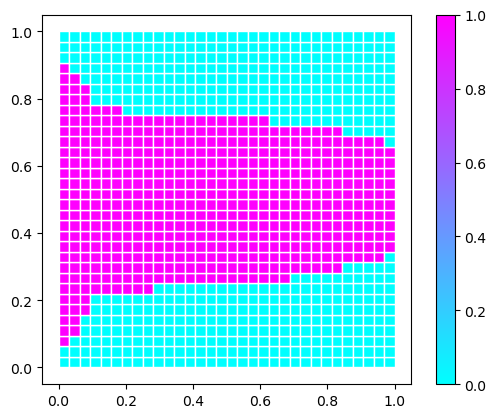

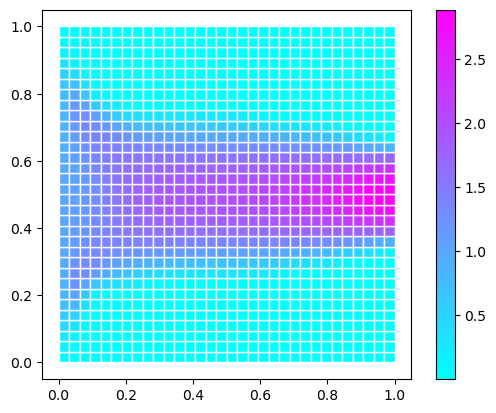

Iteration: 3, Objective Function: 0.010504266927524366, Volume Fraction: 0.49587673611110983
2.881605750474213 0.8337084093008676


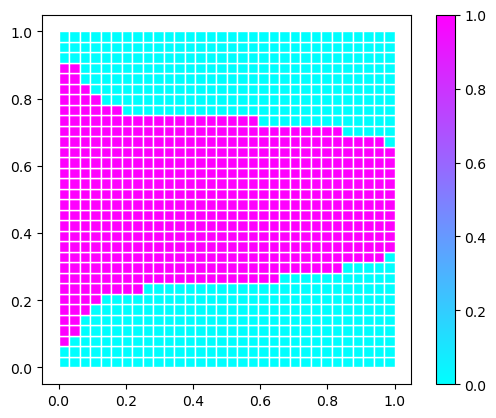

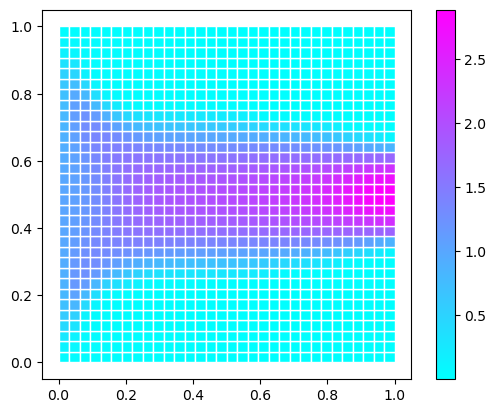

Iteration: 4, Objective Function: 0.010210771598428108, Volume Fraction: 0.4960937499999986
2.8814790519609943 0.8336846108512825


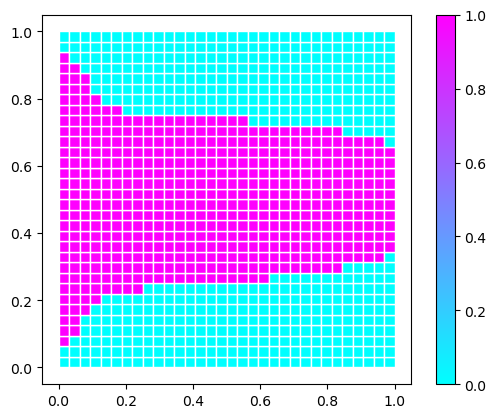

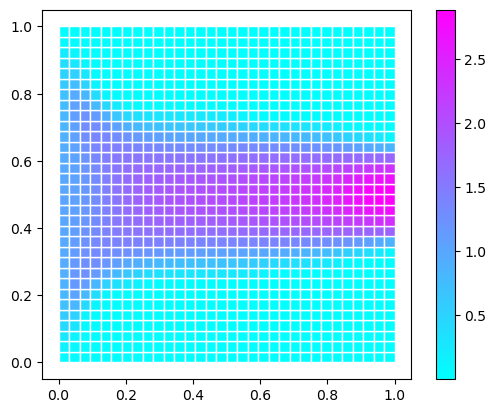

Iteration: 5, Objective Function: 0.009970575935989441, Volume Fraction: 0.4963107638888877
2.881375961216161 0.86185547399364


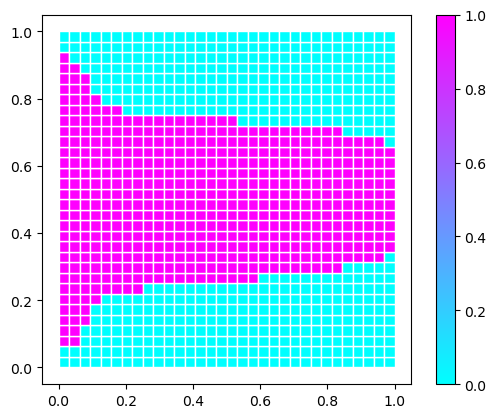

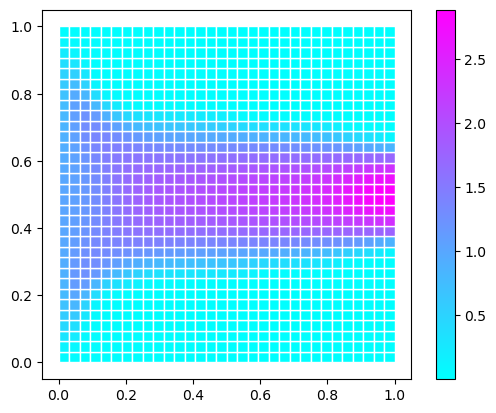

Iteration: 6, Objective Function: 0.009912345008605751, Volume Fraction: 0.4958767361111098
2.881347863482274 0.8621996446501475


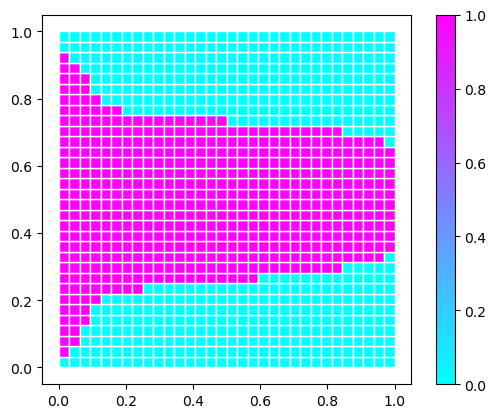

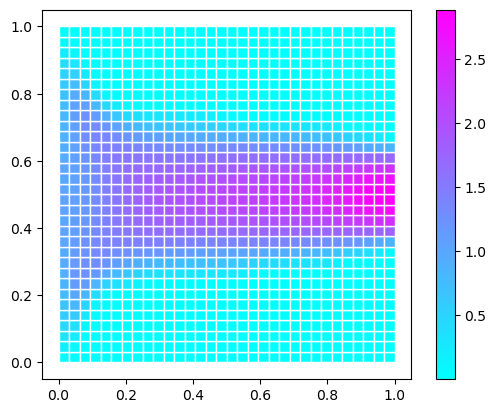

Iteration: 7, Objective Function: 0.009947436879166969, Volume Fraction: 0.5077039930555569
2.881318706933355 0.8621576436797892


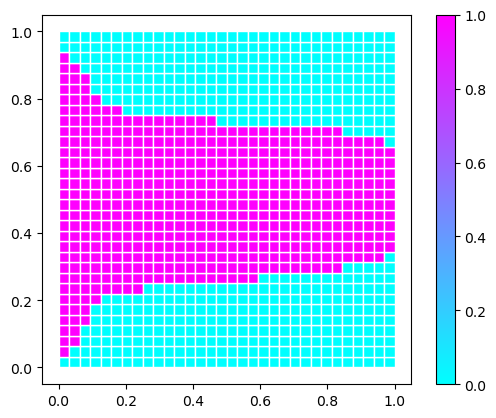

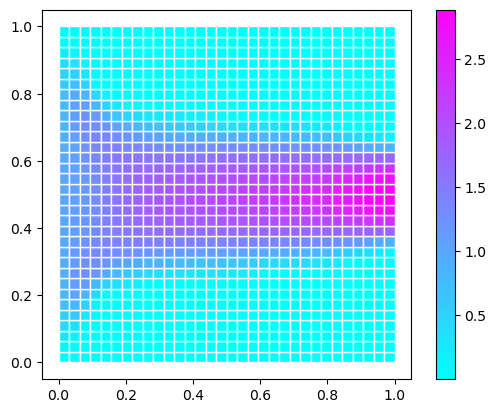

Iteration: 8, Objective Function: 0.009842312677108396, Volume Fraction: 0.5023871527777776
2.881290504785991 0.8620997404192576


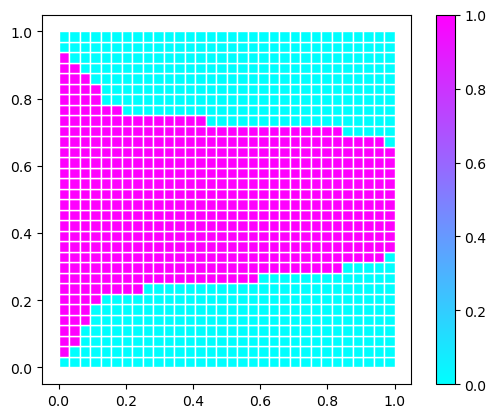

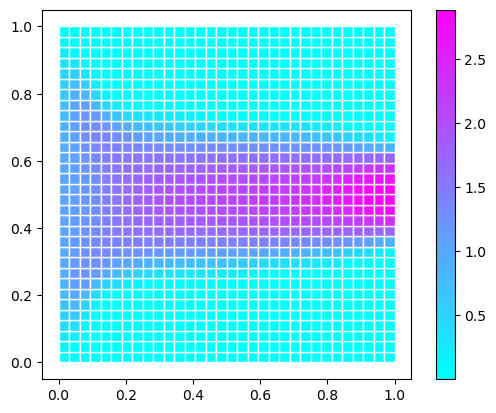

Iteration: 9, Objective Function: 0.009737657424836888, Volume Fraction: 0.5021701388888891
2.8812663604148767 0.862030324159384


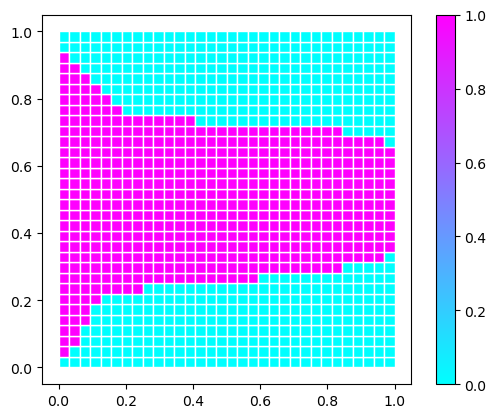

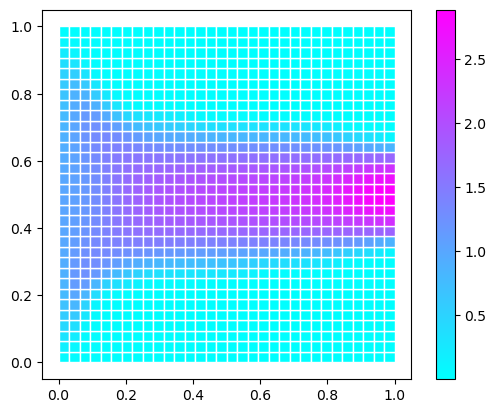

Iteration: 10, Objective Function: 0.009638712053029021, Volume Fraction: 0.5020616319444444
2.8812496273386765 0.8365701978415754


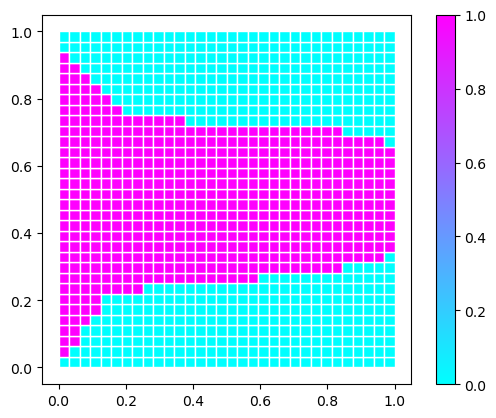

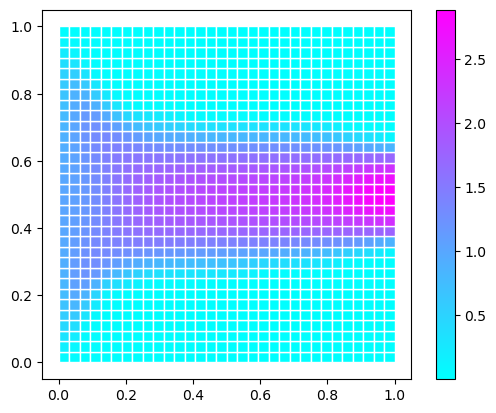

Iteration: 11, Objective Function: 0.009531217617896099, Volume Fraction: 0.5011935763888886
2.819197804579944 0.8364813832550436


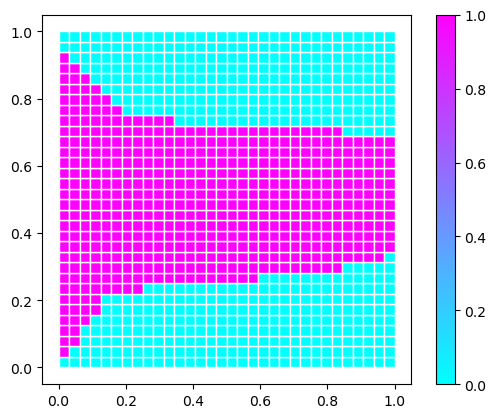

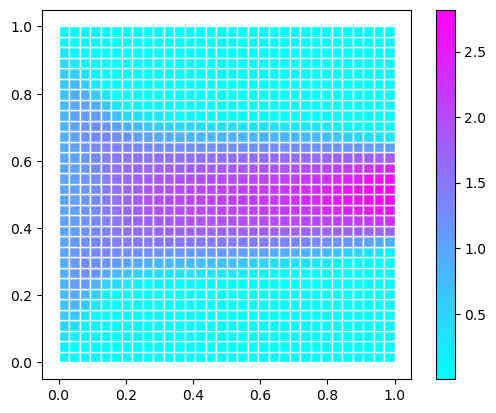

Iteration: 12, Objective Function: 0.009531217617896099, Volume Fraction: 0.4988064236111108
2.819197804579944 0.8364813832550436


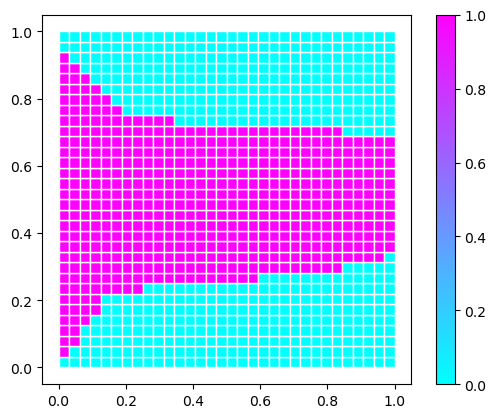

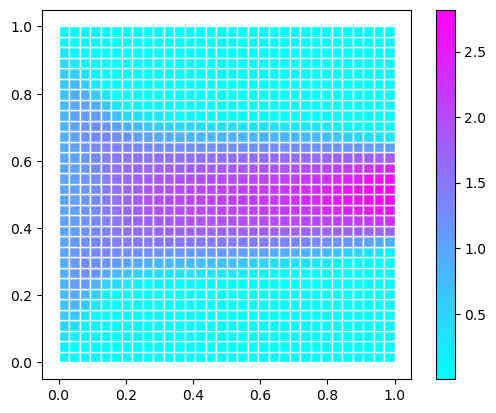

Iteration: 13, Objective Function: 0.009531217617896099, Volume Fraction: 0.4988064236111108
2.819197804579944 0.8364813832550436


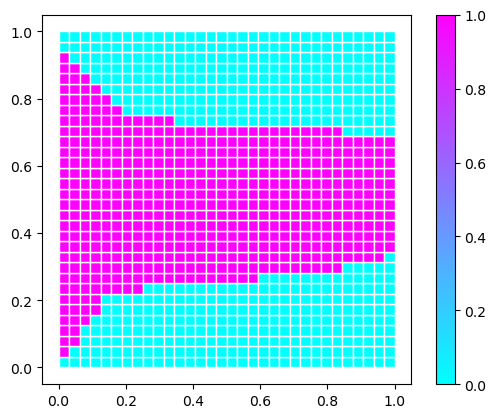

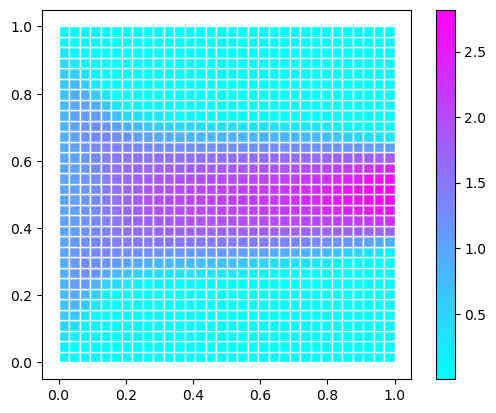

In [19]:
annealing_optimizer = Annealing(fem)
annealing_optimizer.optimize(annealing_solver, 
                             density_initial_QA, density_min, density_max, volume_fraction_max)

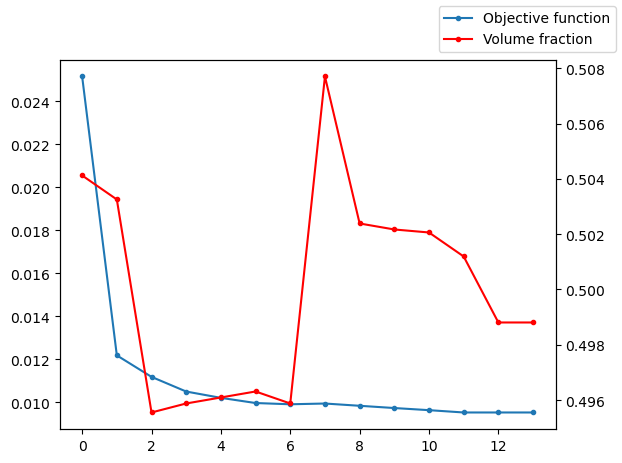

In [20]:
annealing_optimizer.plot_history()